In [7]:
import warnings
warnings.simplefilter("ignore", category=SystemError)


In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import style
from glob import glob
from natsort import natsorted
from tqdm import tqdm
style.use('ggplot')

In [9]:
def show_image_grid(images, M, N, title='Title', figsize=8):
    # Assuming 'images' is a numpy array of shape (num_images, height, width, channels)
    if M==1:
        row_size = figsize
        col_size = figsize//4
    elif N==1:
        row_size = figsize//4
        col_size = figsize
    else:
        row_size, col_size = figsize, figsize

    fig, axes = plt.subplots(M, N, figsize=(row_size, col_size))

    if len(images.shape) < 4:
        images = np.expand_dims(images.copy(), axis=0)

    fig.suptitle(title)
    for i in range(M):
        for j in range(N):
            if M==1 and N==1:
                ax = axes
            elif M == 1 or N==1:
                ax = axes[max(i, j)]
            else:
                ax = axes[i, j]
            index = i * N + j
            if index < images.shape[0]:
                ax.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
            ax.axis('off')
    plt.tight_layout()
    plt.show()

100%|██████████| 5/5 [00:00<00:00, 41.64it/s]


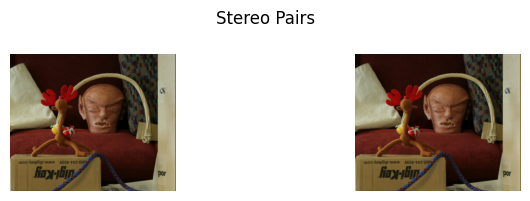

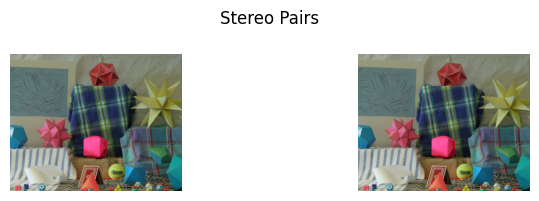

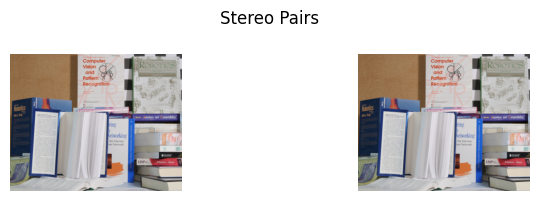

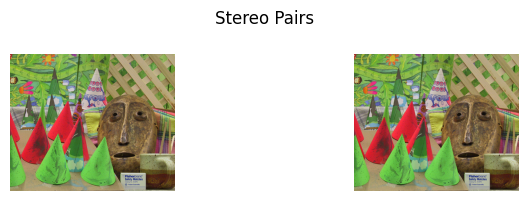

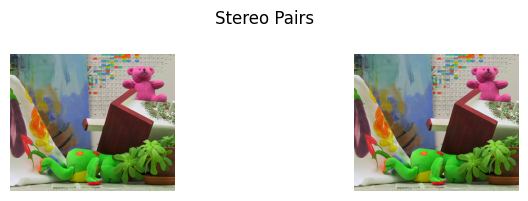

In [11]:
# Loading all the images in the drive
pair_images = []

paths = natsorted(glob(r'E:\iitgn-mtech\sem-3rd\computer-vision\disparity-map-reconstruction-using-stereo-pair\dataset\E\*'))

for idx in tqdm(range(0, len(paths), 2)):
    pair_images.append(np.array([cv2.imread(paths[idx], 1), cv2.imread(paths[idx], 1)]))

for pairs in pair_images:
    show_image_grid(pairs, 1, 2, 'Stereo Pairs', figsize=8)

### Q1: Matching Points
#### Find the matching points between image pair. You can use OpenCV SIFT feature matching. Plot the matching points over the image.

In [18]:
def build_matching_point_pairs(image_a, image_b):
    matching_point_pair_lst = [] # [[image_a points], [image_b points]]
    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and descriptors in both images
    keypoints_a, descriptors_a = sift.detectAndCompute(image_a, None)
    keypoints_b, descriptors_b = sift.detectAndCompute(image_b, None)

    # Check if either image has no descriptors, which means no keypoints were found
    if descriptors_a is None or descriptors_b is None:
        print("No descriptors found in one of the images.")
        return [], []  # No matching points found

    # Use Brute-Force Matcher to find the best matches
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)  # Use L2 norm and cross-checking for better results
    matches = bf.match(descriptors_a, descriptors_b)    

    # Sort the matches based on distance (the lower the distance, the better the match)
    matches = sorted(matches, key=lambda x: x.distance)

    # Extract the matched points (keypoints) from both images
    matched_points_a = np.array([keypoints_a[match.queryIdx].pt for match in matches])
    matched_points_b = np.array([keypoints_b[match.trainIdx].pt for match in matches])
    # matching_point_pair_lst = 
    # Return the list of matched points
    return [matched_points_a , matched_points_b]

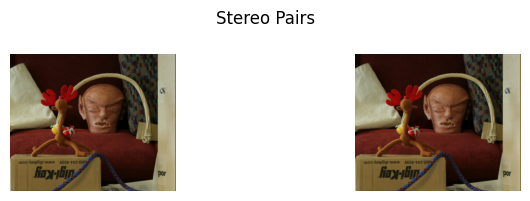

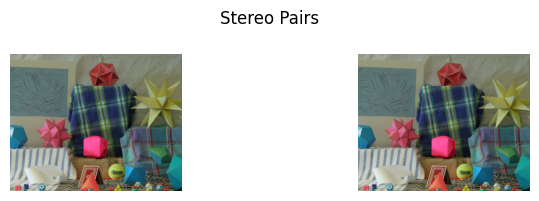

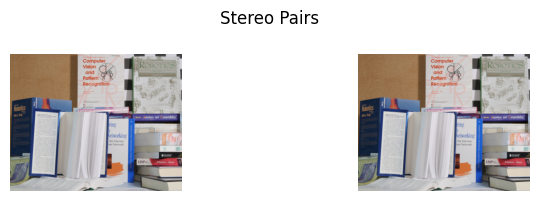

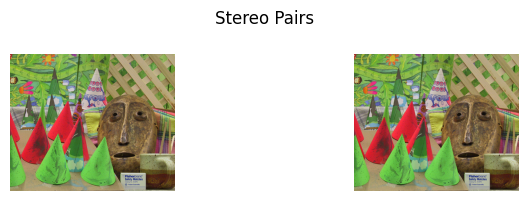

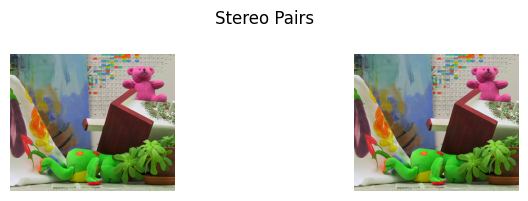

In [19]:
global_matching_point_pair_lst = []

for pairs in pair_images:
    matched_points = build_matching_point_pairs(pairs[0], pairs[1])
    global_matching_point_pair_lst.append(matched_points)
    # Plot the matching points here
    show_image_grid(pairs, 1, 2, 'Stereo Pairs', figsize=8)